HR ANALYTICS PROJECT - UNDERSTANDING THE ATTRITION IN HR

Since, this is both a Classification project, we import libraries accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

Import Dataset from GitHub

In [2]:
df = pd.read_csv("C:\\Users\\adwit\\Downloads\\ibm-hr-analytics-employee-attrition-performance\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Now, we can begin analysing our dataset:

- Check shape
- General Info
- Stats
- Null Values
- Duplicates

In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No Null Columns

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Looking at our standard deviation, we can notice there is some skewness in our data, there must be some outliers

In [7]:
df = df.drop_duplicates()
df.shape

(1470, 35)

In [8]:
df = df.drop(columns = ['EmployeeCount','EmployeeNumber'], axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,80,0,17,3,2,9,6,0,8


Removed Unncessary Columns

No nulls, or duplicates.

Convert target column to binary

In [9]:
attr = []
for i in df['Attrition']:
    if i == 'Yes':
        attr.append(1)
    else:
        attr.append(0)
        
df['Attrition']=attr
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,2,80,2,17,3,2,7,7,7,7


Let's convert all the categorical columns now to numerical ones

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lab = LabelEncoder()

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [14]:
categorical_columns = ['BusinessTravel','Department','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime',]


In [15]:
for i in categorical_columns:
    df[i] = lab.fit_transform(df[i])
    
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,4,80,0,17,3,2,9,6,0,8


Now that we have cleaned our dataset, we are ready to now begin visualizing it

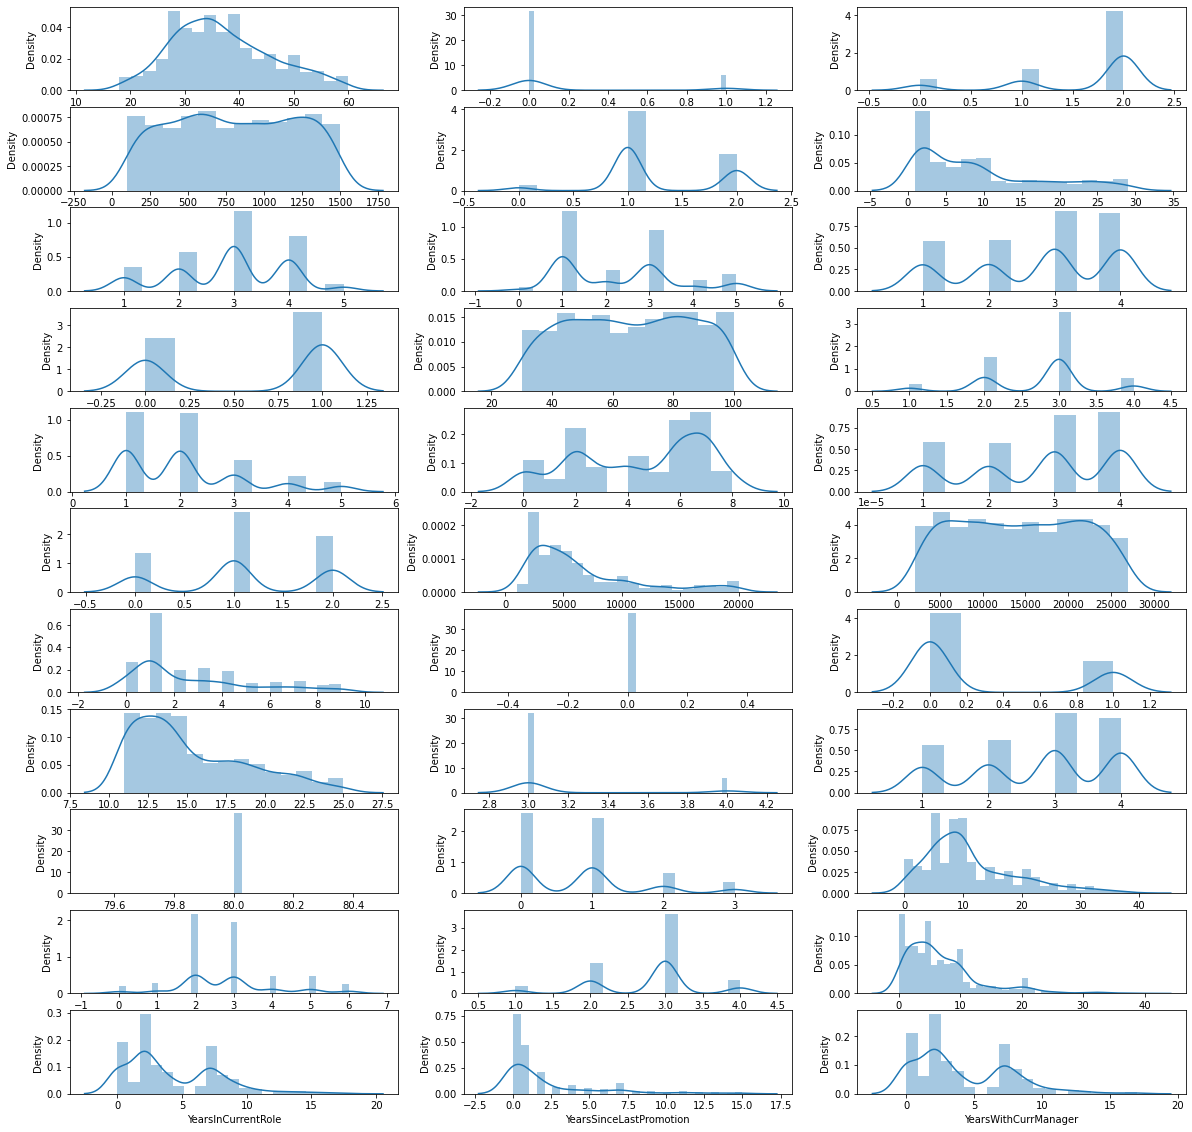

In [16]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=33:
        ax=plt.subplot(11,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

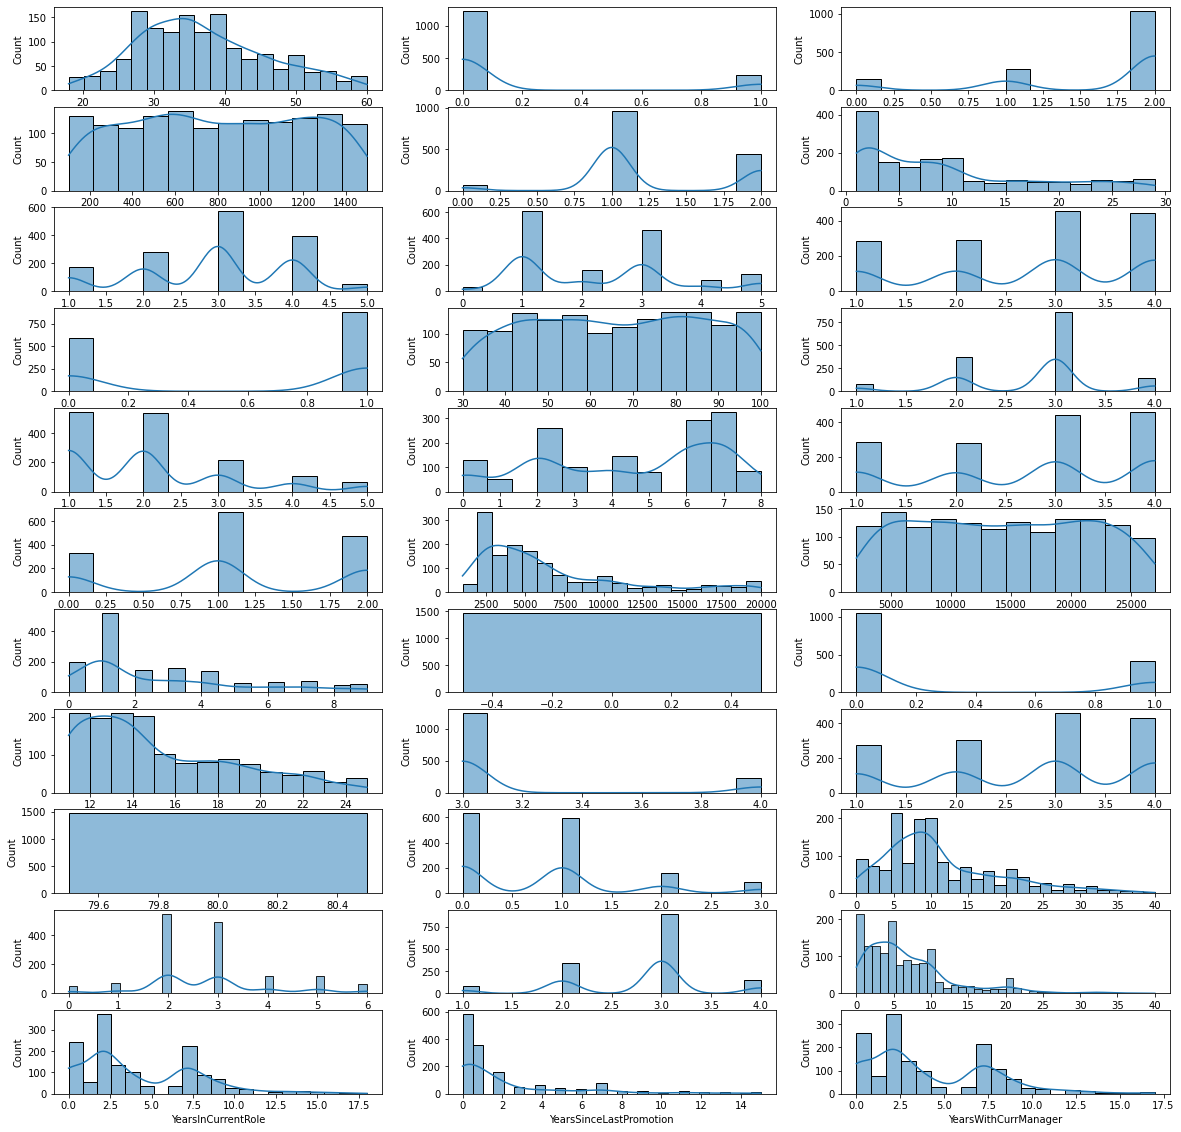

In [17]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=33:
        ax=plt.subplot(11,3,plotnumber)
        sns.histplot(x=column,data=df,kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

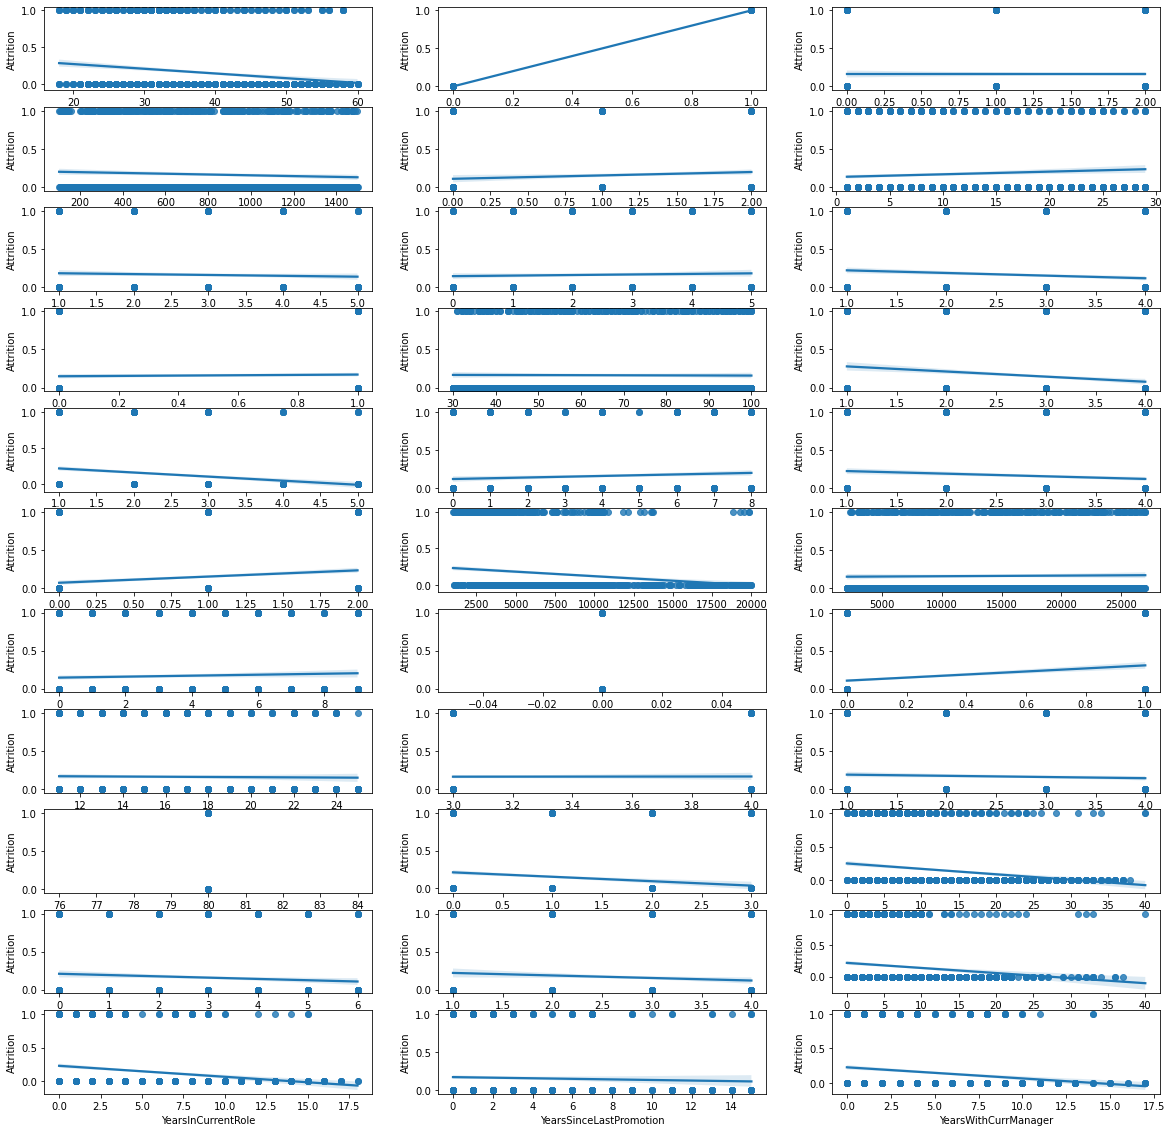

In [18]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=33:
        ax=plt.subplot(11,3,plotnumber)
        sns.regplot(x=column,y='Attrition',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Let's check the heatmap for any multi-collinearity problems

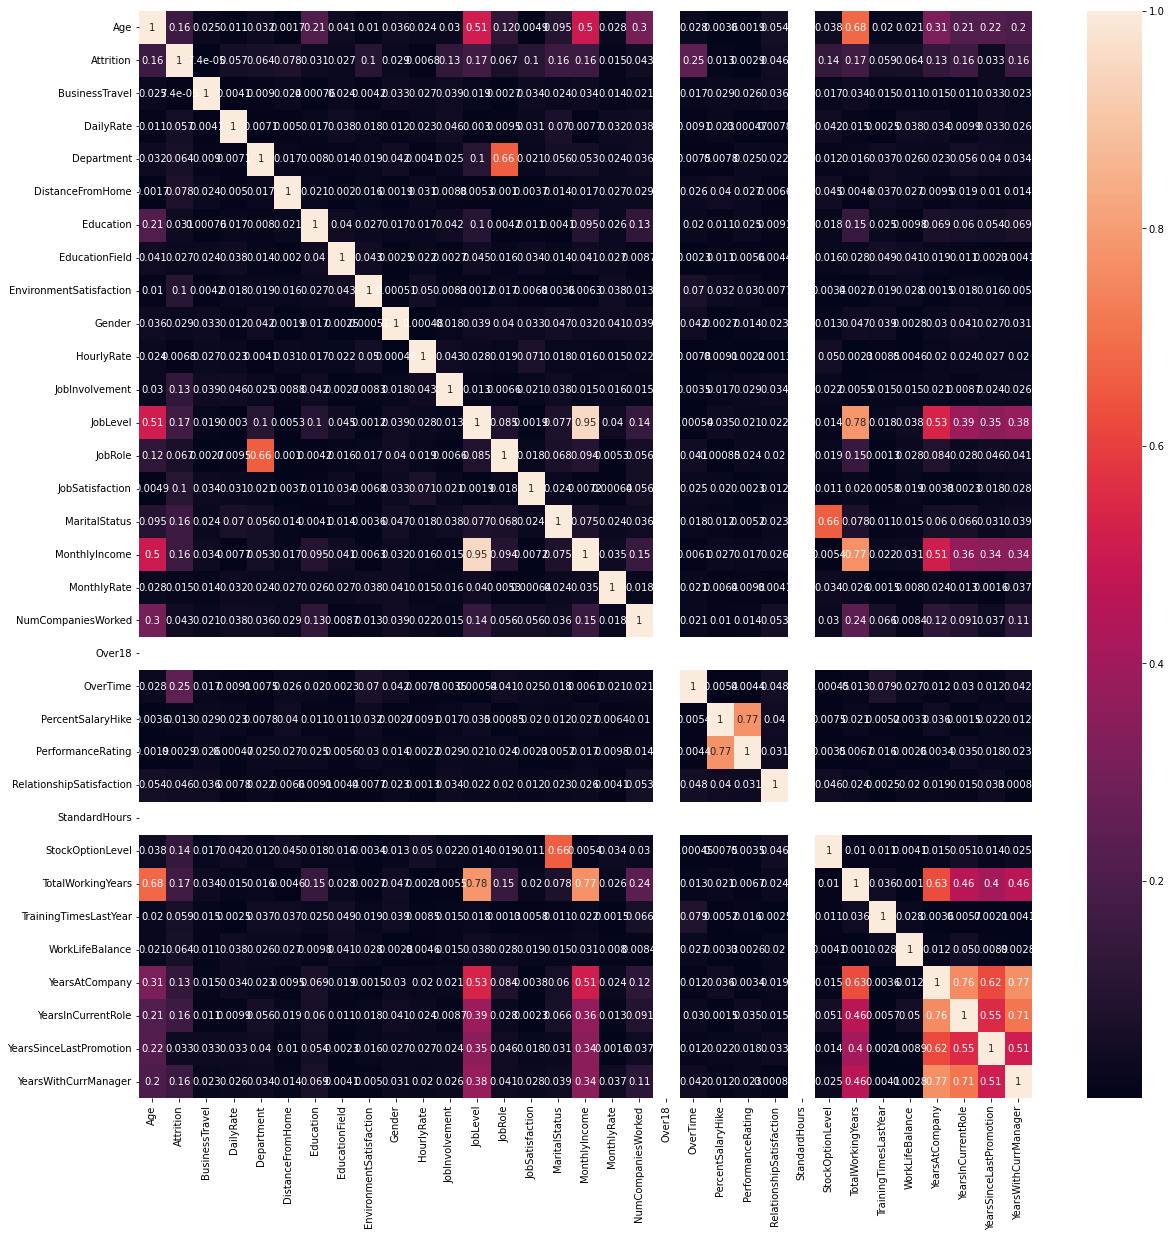

In [19]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

We can see, Job Level and Monthly Income are very highly correlated,
Let's confirm this using scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

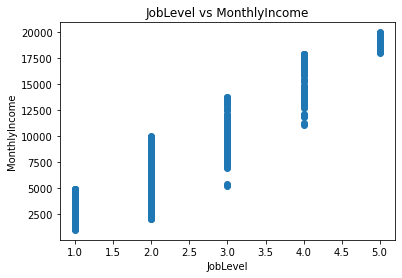

In [20]:
plt.scatter(df['JobLevel'], df['MonthlyIncome'])
plt.xlabel('JobLevel')
plt.ylabel('MonthlyIncome')
plt.title('JobLevel vs MonthlyIncome')
plt.show

We can see there's a high correlation but i don't think it's enough to delete any column so we move on.

In [21]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
T

Let's seperate our dataset into featires and target columns

In [22]:
x = df.drop(columns = ['Attrition'])
y = df.Attrition

In [23]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,4,80,0,17,3,2,9,6,0,8


In [24]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

Use Power Transformer to reduce skewness

In [25]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [26]:
x_scaled = scaler.fit_transform(x.values)
x_scaled

array([[ 0.52213976,  0.63546836,  0.7592893 , ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -1.39286498, -1.33459724, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  0.63546836,  1.34036452, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507,  0.63546836, -1.75171312, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097, -1.39286498,  0.58323545, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832,  0.63546836, -0.35884464, ..., -0.08961473,
         0.09685415, -0.40688122]])

Now, we use PCA to perform dimension reduction for our model

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA()

In [30]:
pca.fit_transform(x_scaled)

array([[ 6.95458956e-02, -4.89169517e-01,  2.14309670e+00, ...,
        -2.45795039e-16, -3.99932412e-17,  2.79342382e-16],
       [-1.31926442e+00, -4.35545664e-01, -6.42721656e-01, ...,
         2.14179125e-17,  1.82811212e-16,  1.55540140e-16],
       [ 3.36230376e+00,  1.21782013e+00,  1.49479206e+00, ...,
        -2.77115045e-17, -2.29893817e-16,  6.37135138e-17],
       ...,
       [ 9.55976238e-01,  4.96423616e-01, -9.57501569e-01, ...,
         5.64022957e-17,  9.00987181e-17,  9.16188060e-17],
       [-1.32740457e+00, -8.13551830e-01,  1.09326343e+00, ...,
        -3.23241377e-17, -5.79579743e-18, -4.16939779e-18],
       [ 5.18169739e-01,  1.57579829e-01,  1.36509817e-02, ...,
         1.86463884e-17, -5.31069693e-18, -2.89599350e-18]])

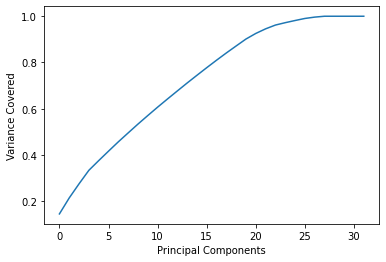

In [31]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.show()

We can see, we only need about 25 components to cover about 95% of variance

In [32]:
pca = PCA (n_components = 25)
new_pcomp = pca.fit_transform(x_scaled)
princi_comp = pd.DataFrame(new_pcomp, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,0.069546,-0.489170,2.143097,-1.045860,1.001179,-2.285738,0.679170,0.221191,2.121947,3.427848,...,0.473896,1.344654,1.069630,0.045802,0.607064,0.494313,1.346392,0.089442,-0.637129,-0.153280
1,-1.319264,-0.435546,-0.642722,0.312678,1.010230,0.274217,-1.298630,1.464207,-1.217147,-1.631632,...,-1.727158,-0.945985,-0.044782,0.031582,0.448390,-0.303383,0.339571,1.517949,0.280485,-0.038182
2,3.362304,1.217820,1.494792,0.938873,0.144146,0.993421,1.005169,-2.511344,1.026900,0.656098,...,1.209991,-1.051206,0.417771,0.908536,0.371534,0.704718,0.041895,0.060242,-0.517153,-0.098037
3,0.327390,-0.811696,0.218359,0.391767,2.013779,-0.004995,0.825256,-0.035610,-0.469639,0.876212,...,1.071593,-0.271869,-0.136377,0.275989,-1.372457,0.777515,-0.554085,0.561856,0.481721,1.719866
4,1.508262,0.653431,-0.581682,0.957026,-0.497713,1.287812,0.367129,-0.415371,-1.324118,0.253363,...,-1.774902,1.986329,0.326848,-0.115800,-0.155966,1.951569,0.384148,-0.561996,-0.610858,-0.153641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.071372,1.271242,-0.376637,0.331764,0.578253,-0.485575,-0.533838,-1.304861,-0.429075,-2.317519,...,-0.193244,0.889061,0.646066,0.952174,1.593533,-0.443278,0.794890,-0.244502,-0.123785,-0.283082
1466,-1.263889,0.524358,-0.715386,1.109381,0.147843,3.127898,-0.132346,0.727359,1.019136,-0.833044,...,-0.726568,-0.336713,-0.015942,1.330035,0.037394,0.383237,0.663821,-0.433428,-0.844996,-0.137766
1467,0.955976,0.496424,-0.957502,0.345729,-0.489346,-2.655255,0.588753,1.027488,-0.391614,1.087186,...,-1.338837,0.080402,1.088962,1.009020,0.448582,-0.838256,0.346175,-1.054121,0.190751,-0.109867
1468,-1.327405,-0.813552,1.093263,-0.948796,0.418537,0.369537,-0.085315,-1.405193,-0.835775,-0.053074,...,-0.430401,-1.031913,0.253914,-0.427158,-0.244534,-1.299718,1.231386,1.035389,-0.187073,-0.042663


In [33]:
princi_comp.skew()

PC1    -0.012999
PC2     0.087423
PC3     0.120946
PC4    -0.012205
PC5     0.173900
PC6    -0.011904
PC7    -0.003304
PC8     0.047457
PC9     0.072616
PC10    0.020105
PC11    0.011847
PC12    0.140008
PC13    0.041884
PC14   -0.001295
PC15    0.119954
PC16   -0.057660
PC17    0.008035
PC18    0.064448
PC19    0.070550
PC20   -0.006862
PC21   -0.061617
PC22    0.274948
PC23    0.378773
PC24    0.134697
PC25    0.146532
dtype: float64

In [48]:
x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size=0.25,random_state=42)

In [49]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [50]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False: 
        pred= clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test,pred,digits =2))

In [51]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 87.02%

 ======TESTING RESULT======
Accuracy Score: 89.40%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       320
           1       0.71      0.31      0.43        48

    accuracy                           0.89       368
   macro avg       0.81      0.65      0.69       368
weighted avg       0.88      0.89      0.88       368



In [52]:
pred = lr.predict(x_test)

Confusion Matrix

In [53]:
conf_matrix = confusion_matrix(y_test,pred)
conf_matrix

array([[314,   6],
       [ 33,  15]], dtype=int64)

We can note that we are getting training accuracy of 87.02% and Testing accuracy of 89.40% with Logistic Regression model

We should now test the data on other models as well to check which model is giving us the best result

In [54]:
from sklearn.svm import SVC

In [55]:
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
ran = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()

In [56]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
svc.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Check Testing Accuracies for other models:

In [57]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(svc.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.8940217391304348
0.8668478260869565
0.779891304347826
0.8804347826086957
0.8777173913043478
0.8994565217391305


Now that we have checked the accuracy for all models, we should plot the ROC-AUC curve to check the best fit model

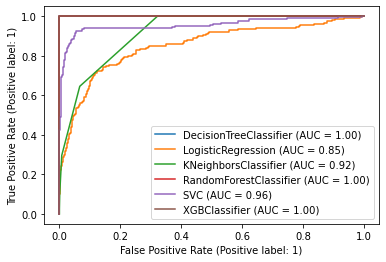

In [58]:
#CHECK ROC AUC CURVE FOR TRAINING

disp = plot_roc_curve(dec,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ran,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(xgb,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

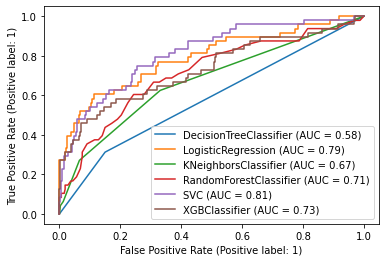

In [59]:
#ROC-AUC CURVE FOR TESTING
disp = plot_roc_curve(dec,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

We can note SVC is the model with highest accuracy model for both Training and Testing, BUT, it is not as consistent as Logistic Regression Model. Therefore our best performing model is still the Logistic Regression Model

Now, we perform some hyperparameter tuning on our Log Reg Model

In [66]:
params = {'solver':['lbfgs','saga'],
         'penalty':['none','l2'],
         'C':[0.1,1,10],
        }

In [68]:
grid = GridSearchCV(lr, param_grid = params, n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'saga']})

In [69]:
print('best parameters: ',grid.best_params_)

best parameters:  {'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}


In [70]:
lr_grid = grid.best_estimator_
lr_grid.fit(x_train,y_train)

LogisticRegression(C=0.1, penalty='none')

In [71]:
metric_score(lr_grid,x_train,x_test,y_train,y_test,train = True)
metric_score(lr_grid,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 86.93%

 ======TESTING RESULT======
Accuracy Score: 89.40%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       320
           1       0.70      0.33      0.45        48

    accuracy                           0.89       368
   macro avg       0.80      0.66      0.70       368
weighted avg       0.88      0.89      0.88       368



We can note great increase in both Training and Testing Accuracy with HyperParameter Tuning

Again, Checking the confusion matrix

In [72]:
pred_hypertuned = lr_grid.predict(x_test)
conf_matrix_hypertuned = confusion_matrix(y_test,pred_hypertuned)
conf_matrix_hypertuned

array([[313,   7],
       [ 32,  16]], dtype=int64)